In [233]:
# !python -m pip install --upgrade pip
# !python -m pip install git+https://github.com/AbnerErnaniADSFatec/eocubes
# !python -m pip install git+https://github.com/brazil-data-cube/wlts.py@b-0.6
# !python -m pip install ipywidgets
# !python -m pip install seaborn
# !python -m pip install wtss

In [238]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import wlts
import datetime
%matplotlib inline

from wtss import WTSS
from eocube import DataCube, Image, Spectral, info, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"
service_wlts = wlts.WLTS('https://brazildatacube.dpi.inpe.br/wlts/')
service = WTSS('https://brazildatacube.dpi.inpe.br/', access_token=config.ACCESS_TOKEN)

def cut_square_image(image, _min, _max):
    _cut = []
    for y in range(_min, _max):
        _y = []
        for x in range(_min, _max):
            _y.append(image[y][x])
        _cut.append(_y)
    return np.array(_cut)

In [3]:
info.collections()

stac("https://brazildatacube.dpi.inpe.br/stac/")

In [4]:
info.describe("CB4_64_16D_STK-1")

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,1.0,255.0,0.0,1.0,uint8
CMASK,quality,0.0,4.0,255.0,1.0,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,1.0,int16
TOTALOB,TotalOb,1.0,255.0,0.0,1.0,uint8


In [5]:
%%time
eodatacube = DataCube(
    collections=["CB4_64_16D_STK-1"],
    query_bands=['red', 'green', 'blue', 'nir', 'evi', 'ndvi', 'quality'],
    bbox=[-65.9614567, -8.3474771, -59.8097337, -12.8460981],
    start_date="2015-01-01",
    end_date="2019-12-31",
    limit=100
)

CPU times: user 219 ms, sys: 32 ms, total: 251 ms
Wall time: 8.24 s


In [6]:
dates = []
for date in list(eodatacube.data_images.keys()):
    dates.append(date.strftime("%Y-%m-%d"))
dates.reverse()
f"{len(dates)} images"

'25 images'

In [40]:
cmask = eodatacube.select(band="quality",time=dates[20])
cmask

<xarray.DataArray ['ResultSearch_quality'] (time: 1, y: 4795, x: 8889)>
array([[[127, 127, 127, ..., 255, 255, 255],
        [127, 127, 127, ..., 255, 255, 255],
        [127, 127, 127, ..., 255, 255, 255],
        ...,
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127]]], dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2019-10-16
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 4788 4789 4790 4791 4792 4793 4794
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 8882 8883 8884 8885 8886 8887 8888
Attributes:
    CB4_64_16D_STK-1:  CBERS-4 - AWFI - Cube Stack 16 days - v001

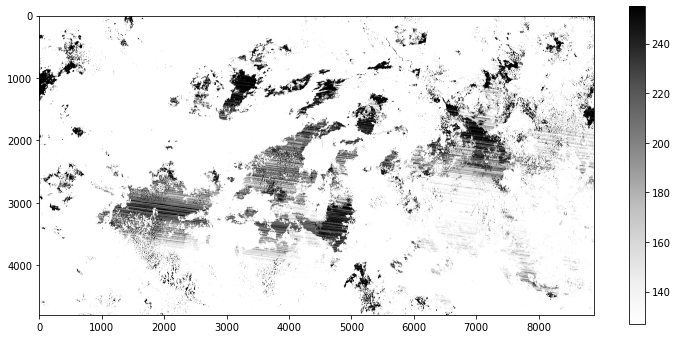

In [44]:
cmask = cmask.values[0]
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greys', 1000)
plt.imshow(cmask, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

In [35]:
red = eodatacube.select(band="red",time=dates[20])
red = red.values[0]
green = eodatacube.select(band="green",time=dates[20])
green = green.values[0]
blue = eodatacube.select(band="blue",time=dates[20])
blue = blue.values[0]

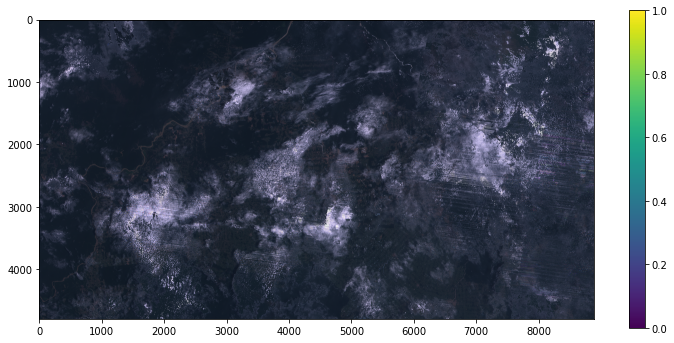

In [38]:
rgb = np.dstack(
    (Spectral()._normalize(red), Spectral()._normalize(green), Spectral()._normalize(blue))
)
plt.figure(figsize=(10, 5))
plt.imshow(rgb)
plt.tight_layout()
plt.colorbar()

plt.show()

In [50]:
red_hist, red_bin_edges = np.histogram(red, bins=256)
green_hist, green_bin_edges = np.histogram(green, bins=256)
blue_hist, blue_bin_edges = np.histogram(blue, bins=256)

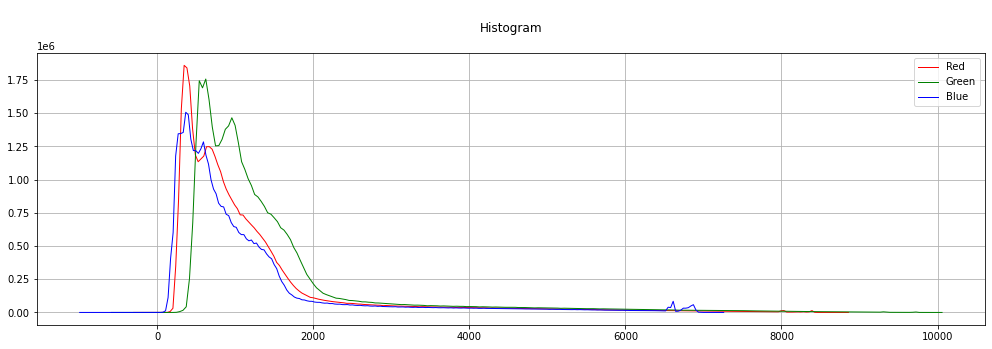

In [51]:
plt.figure(figsize=(17,5))
plt.title(f"\nHistogram\n")
plt.plot(red_bin_edges[0:-1], red_hist, color="red", linewidth=1, label='Red')
plt.plot(green_bin_edges[0:-1], green_hist, color="green", linewidth=1, label='Green')
plt.plot(blue_bin_edges[0:-1], blue_hist, color="blue", linewidth=1, label='Blue')
plt.legend()
plt.grid()
plt.show()

In [39]:
nir = eodatacube.select(band="nir",time=dates[20])
nir

<xarray.DataArray ['ResultSearch_nir'] (time: 1, y: 4795, x: 8889)>
array([[[3784, 3768, 3728, ..., 4596, 4736, 4762],
        [3832, 3814, 3708, ..., 4589, 4623, 4735],
        [3854, 3880, 3773, ..., 4655, 4749, 4791],
        ...,
        [4204, 4147, 4126, ..., 3335, 3429, 3532],
        [4122, 4179, 4148, ..., 3283, 3393, 3487],
        [4123, 4139, 4134, ..., 5479, 3300, 3387]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2019-10-16
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 4788 4789 4790 4791 4792 4793 4794
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 8882 8883 8884 8885 8886 8887 8888
Attributes:
    CB4_64_16D_STK-1:  CBERS-4 - AWFI - Cube Stack 16 days - v001

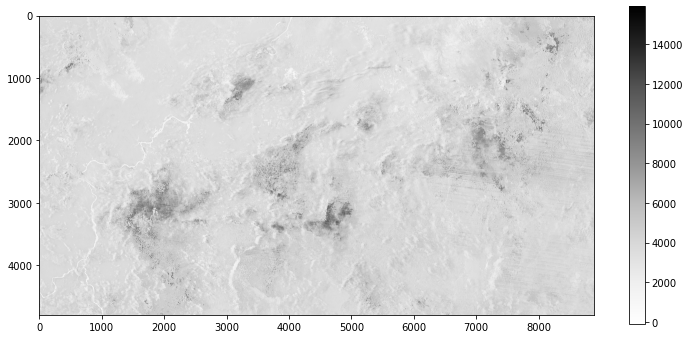

In [42]:
nir = nir.values[0]
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greys', 1000)
plt.imshow(nir, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

In [45]:
histogram, bin_edges = np.histogram(nir, bins=256)

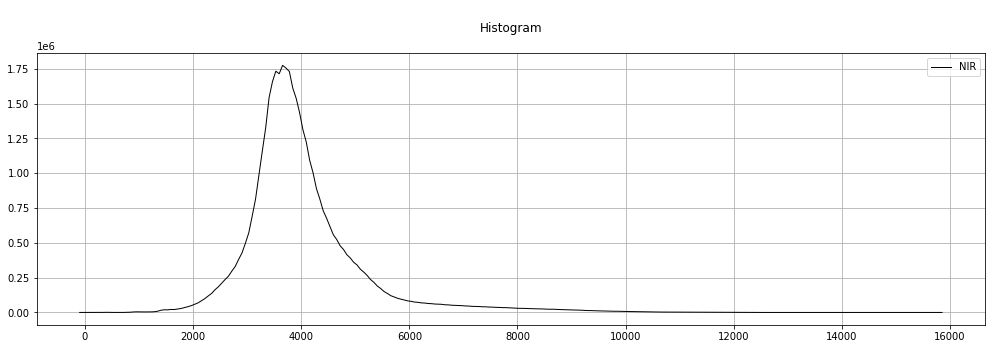

In [46]:
plt.figure(figsize=(17,5))
plt.title(f"\nHistogram\n")
plt.plot(bin_edges[0:-1], histogram, color="black", linewidth=1, label='NIR')
plt.legend()
plt.grid()
plt.show()

In [79]:
ndvi = eodatacube.calculateNDVI(time=dates[20])
ndvi

<xarray.DataArray ['ImageNDVI'] (time: 1, y: 4795, x: 8889)>
array([[[0.82449373, 0.82602375, 0.82655561, ..., 0.38558939,
         0.37315164, 0.3318417 ],
        [0.83261597, 0.82575395, 0.82300885, ..., 0.39271624,
         0.36795384, 0.35401773],
        [0.83392815, 0.83018868, 0.82756115, ..., 0.37457552,
         0.33473862, 0.36282179],
        ...,
        [0.855661  , 0.85382208, 0.84443451, ..., 0.77724487,
         0.76661515, 0.77131394],
        [0.85092052, 0.85239362, 0.84314597, ..., 0.77363587,
         0.76031128, 0.76780735],
        [0.84556849, 0.85190157, 0.84677239, ..., 0.80438004,
         0.76282051, 0.76360323]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-10-16
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 4788 4789 4790 4791 4792 4793 4794
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 8882 8883 8884 8885 8886 8887 8888
Attributes:
    CB4_64_16D_STK-1:  CBERS-4 - AWFI - Cube Stack 16 days - v001

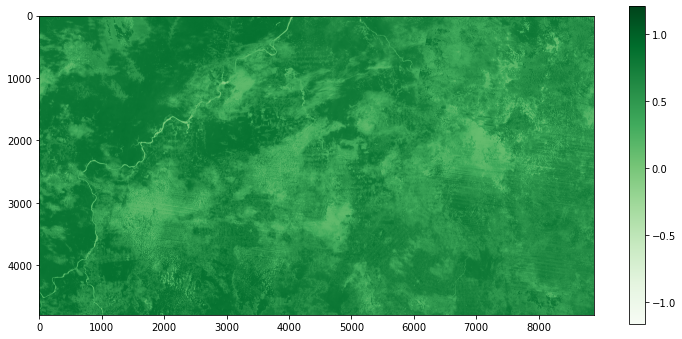

In [80]:
ndvi = ndvi.values[0]
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(ndvi, cmap=colormap)
plt.tight_layout()
plt.colorbar()

plt.show()

In [81]:
_min, _max = 1000, 4000
rgb_cut = cut_square_image(rgb, _min, _max)
ndvi_cut = cut_square_image(ndvi, _min, _max)
nir_cut = cut_square_image(nir, _min, _max)
cmask_cut = cut_square_image(cmask, _min, _max)

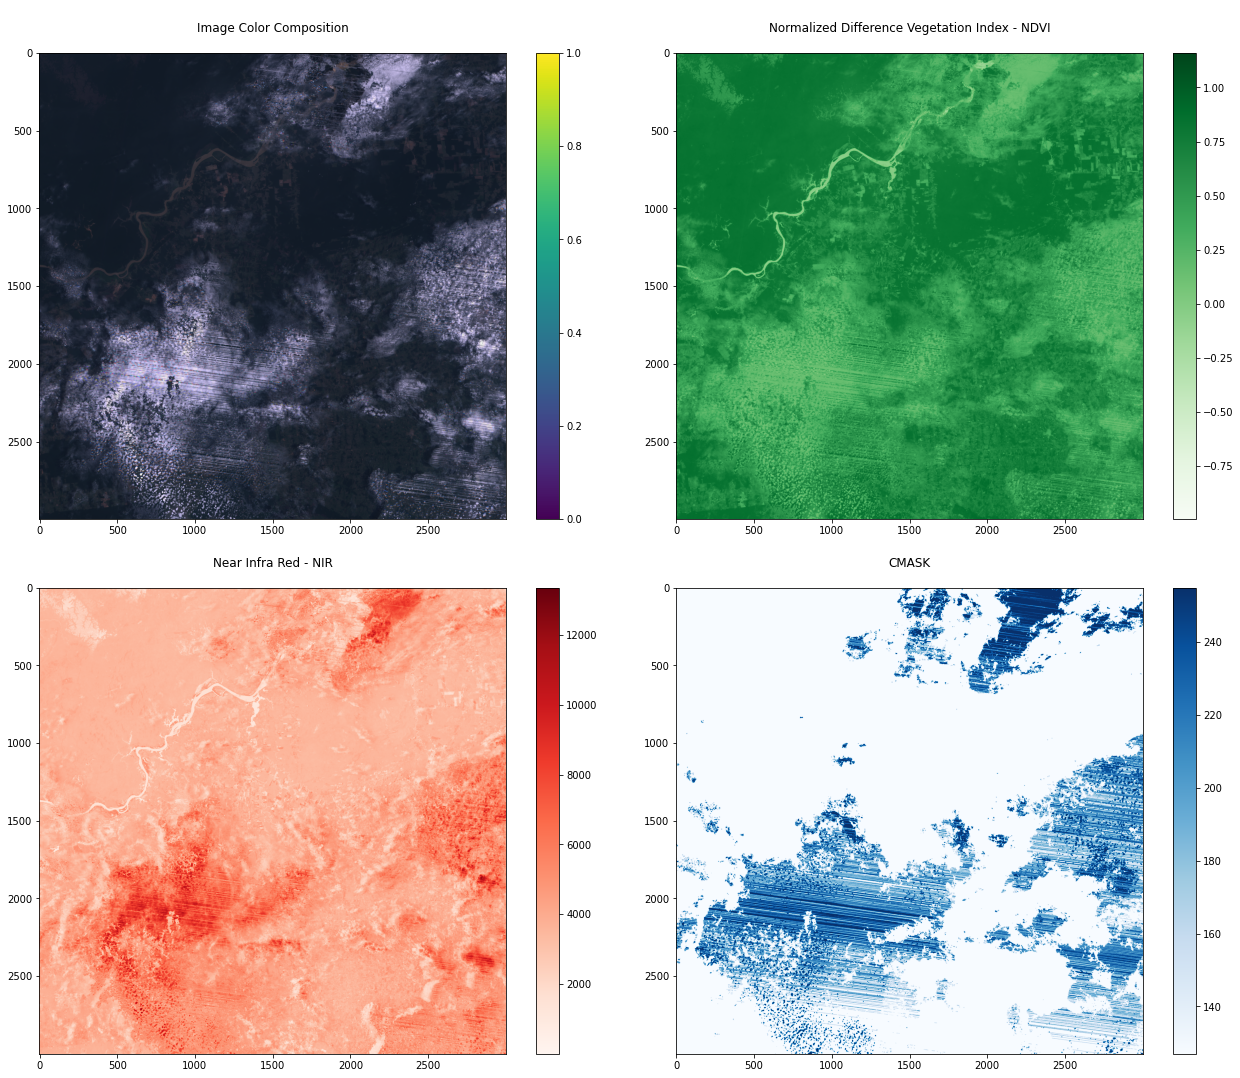

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(18, 15))
steps = 1000

_rgb = rgb_cut # aplicação de contraste
img = axs[0][0].imshow(_rgb)
axs[0][0].set_title('\nImage Color Composition\n')
fig.colorbar(img, ax=axs[0][0])

_ndvi = ndvi_cut # aplicação de contraste
colormap = plt.get_cmap('Greens', steps)
img = axs[0][1].imshow(_ndvi, cmap=colormap)
axs[0][1].set_title('\nNormalized Difference Vegetation Index - NDVI\n')
fig.colorbar(img, ax=axs[0][1])

_nir = nir_cut # aplicação de contraste
colormap = plt.get_cmap('Reds', steps)
img = axs[1][0].imshow(_nir, cmap=colormap)
axs[1][0].set_title('\nNear Infra Red - NIR\n')
fig.colorbar(img, ax=axs[1][0])

_cmask = cmask_cut # aplicação de contraste
colormap = plt.get_cmap('Blues', steps)
img = axs[1][1].imshow(_cmask, cmap=colormap)
axs[1][1].set_title('\nCMASK\n')
fig.colorbar(img, ax=axs[1][1])

fig.tight_layout()
plt.show()

In [88]:
eodatacube.data_images, len(eodatacube.data_images)

({datetime.datetime(2019, 12, 19, 0, 0): <eocube.image.Image at 0x7fd09cd7cd30>,
  datetime.datetime(2019, 12, 3, 0, 0): <eocube.image.Image at 0x7fd09cba00d0>,
  datetime.datetime(2019, 11, 17, 0, 0): <eocube.image.Image at 0x7fd09cba03d0>,
  datetime.datetime(2019, 11, 1, 0, 0): <eocube.image.Image at 0x7fd09cba06d0>,
  datetime.datetime(2019, 10, 16, 0, 0): <eocube.image.Image at 0x7fd09cba09d0>,
  datetime.datetime(2019, 9, 30, 0, 0): <eocube.image.Image at 0x7fd09cba0cd0>,
  datetime.datetime(2019, 9, 14, 0, 0): <eocube.image.Image at 0x7fd09cba0fd0>,
  datetime.datetime(2019, 8, 29, 0, 0): <eocube.image.Image at 0x7fd09cba3310>,
  datetime.datetime(2019, 8, 13, 0, 0): <eocube.image.Image at 0x7fd09cba3610>,
  datetime.datetime(2019, 7, 28, 0, 0): <eocube.image.Image at 0x7fd09cba3910>,
  datetime.datetime(2019, 7, 12, 0, 0): <eocube.image.Image at 0x7fd09cba3c10>,
  datetime.datetime(2019, 6, 26, 0, 0): <eocube.image.Image at 0x7fd09cba3f10>,
  datetime.datetime(2019, 6, 10, 0, 0

In [89]:
# Image._afimPointsToCoord?
sample_img = eodatacube.data_images[datetime.datetime(2019, 12, 19, 0, 0)]
sample_img._afimPointsToCoord(1081, 1081, "nir")

(-65.35154719709688, -8.989352010154533)

In [96]:
time_series = eodatacube.getTimeSeries(
    band='nir', lon=-65.86642239520384, lat=-8.447916311382915
)
time_series

<xarray.DataArray ['TimeSeries_NIR'] (time: 25)>
array([3485, 7091, 5048, 3241, 3120, 7895, 3099, 2154, 4579, 3595, 3721,
       3243, 3048, 3324, 3331, 3444, 3188, 3277, 3490, 3500, 3567, 4617,
       3860, 3779, 4863], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-03 2018-12-19 ... 2019-12-19
Attributes:
    longitude:  -65.86642239520384
    latitude:   -8.447916311382915

In [98]:
cmask_time_series = eodatacube.getTimeSeries(
    band='quality', lon=-65.86642239520384, lat=-8.447916311382915
)
cmask_time_series

<xarray.DataArray ['TimeSeries_QUALITY'] (time: 25)>
array([127, 255, 255, 127, 127, 255, 127, 127, 255, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 255, 127, 127, 255],
      dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-03 2018-12-19 ... 2019-12-19
Attributes:
    longitude:  -65.86642239520384
    latitude:   -8.447916311382915

In [295]:
wtss_ts = service["CB4_64_16D_STK-1"].ts(
    attributes=('BAND16'),
    latitude=-8.447916311382915, longitude=-65.86642239520384,
    start_date="2015-01-01", end_date="2019-12-31"
)

In [303]:
# EOCubes Time Series
x = time_series.time
y_nir = time_series
x_cmask = []
y_cmask = cmask_time_series
clean_ts = []
noise = []
time_clean_ts = []

for i in range(len(x)):
    if 230 <= y_cmask[i].values <= 255:
        x_cmask.append(x[i].values)
        
for i in range(len(dates)):
    value = False
    for j in range(len(x_cmask)):
        if x[i].values == x_cmask[j]:
            value = y_nir[i].values
    if value:
        noise.append(value)

for i in range(len(dates)):
    value = y_nir[i].values
    if value not in noise:
        clean_ts.append(value)
        time_clean_ts.append(datetime.datetime.strptime(dates[i], '%Y-%m-%d'))

# WTSS BDC Time Series
wtss_x = wtss_ts.timeline
wtss_y = wtss_ts.BAND16
time_line = []
values = []

for i in range(len(wtss_x)):
    date = datetime.datetime.strptime(wtss_x[i], '%Y-%m-%dT00:00:00')
    for j in range(len(time_clean_ts)):
        if date == time_clean_ts[j]:
            time_line.append(date)
            values.append(wtss_y[i])

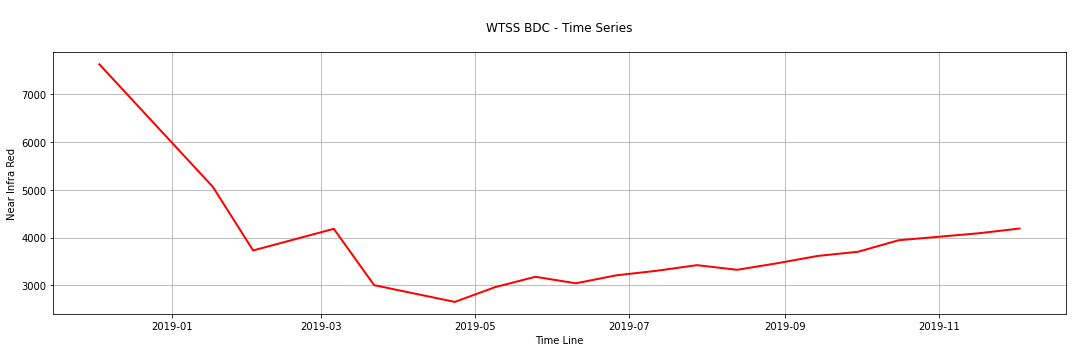

In [325]:
plt.figure(figsize=(15,5))
plt.title(f"\nWTSS BDC - Time Series\n")
plt.xlabel('Time Line')
plt.ylabel('Near Infra Red')
plt.plot(time_line, values, color="red", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

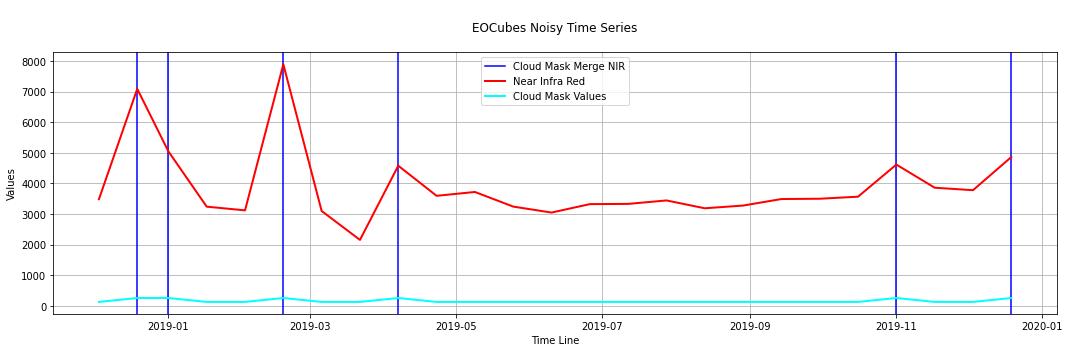

In [326]:
plt.figure(figsize=(15,5))
plt.title(f"\nEOCubes Noisy Time Series\n")
plt.xlabel('Time Line')
plt.ylabel('Values')
for i in range(len(x_cmask) - 1):
    plt.axvline(x=x_cmask[i], color='blue', linestyle='-')
plt.axvline(x=x_cmask[len(x_cmask) - 1], label="Cloud Mask Merge NIR", color='blue', linestyle='-')
plt.plot(x, y_nir, color="red", label="Near Infra Red", linewidth=2)
plt.plot(x, y_cmask, color="cyan", label="Cloud Mask Values", linewidth=2)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

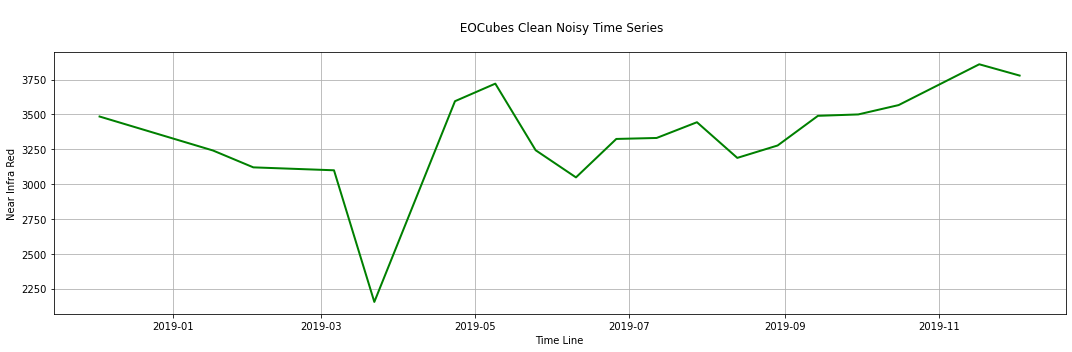

In [329]:
plt.figure(figsize=(15,5))
plt.title(f"\n EOCubes Clean Noisy Time Series\n")
plt.xlabel('Time Line')
plt.ylabel('Near Infra Red')
plt.plot(time_clean_ts, clean_ts, color="green", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

In [307]:
lon=-65.86642239520384
lat=-8.447916311382915
tj = service_wlts.tj(latitude=lat, longitude=lon)

In [103]:
tj.trajectory[0]

{'class': 'Vegetação Florestal',
 'collection': 'ibge_cobertura_uso_terra',
 'date': '2000'}